In [1]:
import pandas as pd
import numpy as np
import matplotlib as pl
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  #  - your model

In [2]:
data = pd.read_csv("bikes_train.csv")

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["dayofweek"] = data["datetime"].dt.dayofweek      #The day of the week with Monday=0, Sunday=6
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
data["hour"] = data["datetime"].dt.hour

In [5]:
y = data["count"]
features = ["season","holiday","workingday","weather","temp","atemp","humidity","windspeed","dayofweek","year","month","day","hour"]
X = data[features]

In [6]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dayofweek,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,5,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,5,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,5,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,5,2011,1,1,4


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
parameters = {"n_estimators":[100], 'max_features': np.arange(0.05, 1.01, 0.2), "bootstrap":[True, False], "criterion":["mse"]} 
forest = RandomForestRegressor()

In [11]:
regresor = GridSearchCV(estimator=forest, param_grid=parameters, return_train_score=True)

In [12]:
regresor.fit(X=X_train, y=y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'max_features': array([0.05, 0.25, 0.45, 0.65, 0.85]), 'bootstrap': [True, False], 'criterion': ['mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
sorted(regresor.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_bootstrap',
 'param_criterion',
 'param_max_features',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [14]:
regresor.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.8500000000000001, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
prediction_rfc = regresor.predict(X_test)

In [16]:
prediction_rfc

array([138.1 ,  42.15, 158.89, ..., 463.92,   8.16, 160.97])

In [17]:
results = pd.DataFrame({"y_true":y_test, "y_rfc": prediction_rfc})

In [18]:
def rmsle(y_pred, y_true) :
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_true))**2))

In [19]:
rmsle(y_pred=prediction_rfc, y_true=y_test)

0.32943235897546386

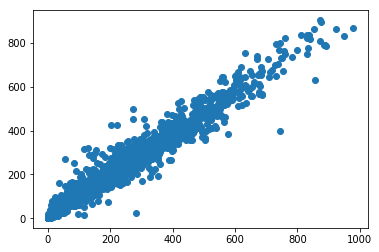

In [20]:
import matplotlib as pl
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, prediction_rfc)

In [21]:
pd.DataFrame(prediction_rfc).to_csv(path_or_buf="prediction_rfc.csv")

In [22]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dayofweek,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,5,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,5,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,5,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,5,2011,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,5,2011,1,1,5
6,1,0,0,1,9.02,13.635,80,0.0000,5,2011,1,1,6
7,1,0,0,1,8.20,12.880,86,0.0000,5,2011,1,1,7
8,1,0,0,1,9.84,14.395,75,0.0000,5,2011,1,1,8
9,1,0,0,1,13.12,17.425,76,0.0000,5,2011,1,1,9


In [23]:
test = pd.read_csv("bikes_test.csv")

In [24]:
regresor = GridSearchCV(estimator=forest, param_grid=parameters, return_train_score=True)
regresor.fit(X=X, y=y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100], 'max_features': array([0.05, 0.25, 0.45, 0.65, 0.85]), 'bootstrap': [True, False], 'criterion': ['mse']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
test["datetime"] = pd.to_datetime(test["datetime"])
test["dayofweek"] = test["datetime"].dt.dayofweek      #The day of the week with Monday=0, Sunday=6
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dayofweek,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,3,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,3,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,2011,1,20,4


In [26]:
kaggle_test = test[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed","dayofweek","year","month","day","hour"]]

In [27]:
test["count"] = regresor.predict(kaggle_test)

In [28]:
test[["datetime", "count"]]

,datetime,count
0,2011-01-20 00:00:00,13.76
1,2011-01-20 01:00:00,6.41
2,2011-01-20 02:00:00,6.00
3,2011-01-20 03:00:00,3.39
4,2011-01-20 04:00:00,2.53
5,2011-01-20 05:00:00,7.70
6,2011-01-20 06:00:00,35.00
7,2011-01-20 07:00:00,93.85
8,2011-01-20 08:00:00,192.95
9,2011-01-20 09:00:00,121.42


In [29]:
test[["datetime", "count"]].to_csv("kaggle2.csv", index=False)